# **Dimensionality Reduction and Classification with Kernel PCA on the Wine Dataset**

This notebook demonstrates how to apply Kernel Principal Component Analysis (KPCA) for nonlinear dimensionality reduction on the Wine dataset. It includes preprocessing, feature scaling, and classification using logistic regression. Results are visualized for both training and test sets to evaluate model performance.

# Kernel PCA

The main difference between Principal Component Analysis (PCA) and Kernel PCA (KPCA) lies in their ability to handle linear and nonlinear data.

## **Difference Between Principal Component Analysis (PCA) and Kernel PCA (KPCA)**

### 1. Principal Component Analysis (PCA)
- **Type of Technique**: Linear dimensionality reduction technique.
- **How it Works**: PCA identifies the directions (called principal components) that capture the maximum variance in the data. These directions are linear combinations of the original features.
- **Use Case**: Works well when the data has linear relationships between variables.
- **Computation**: It computes the principal components using covariance matrices and Eigenvalue decomposition.
- **Limitations**: PCA fails when the data has complex, nonlinear relationships.

### 2. Kernel Principal Component Analysis (KPCA)
- **Type of Technique**: Nonlinear dimensionality reduction technique.
- **How it Works**: KPCA extends PCA by applying the **kernel trick**, which implicitly maps the original data into a higher-dimensional space, where the relationships between features become linear, and then applies PCA. This allows it to capture nonlinear relationships in the original data.
- **Use Case**: KPCA is effective for complex datasets with nonlinear patterns that PCA cannot handle.
- **Computation**: Instead of computing covariance matrices directly, KPCA uses a kernel matrix (such as polynomial, Gaussian, or sigmoid kernels) to calculate the principal components in the new feature space.
- **Advantages**: Can capture more complex structures and patterns in data that PCA cannot.


## **Defining Linear and Nonlinear Relationships**

### 1. Linear Relationship
A **linear relationship** exists when there is a direct, proportional relationship between two variables. If you plot the relationship on a graph, it will form a straight line. The change in the dependent variable \( y \) is consistent with the change in the independent variable \( x \). Mathematically, a linear relationship is represented by an equation of the form:

\[
y = mx + b
\]

Where:
- \( y \) is the dependent variable,
- \( x \) is the independent variable,
- \( m \) is the slope of the line (rate of change),
- \( b \) is the y-intercept (where the line crosses the y-axis).

**Characteristics of Linear Relationships:**
- The rate of change between variables is constant.
- The relationship between variables can be described by a straight line on a graph.

**Examples**: Distance traveled vs. time at a constant speed, simple linear regression.

**Example**:
\[
y = 3x + 2
\]
Here, for every unit increase in \( x \), \( y \) increases by 3, which is a constant rate.

---

### 2. Nonlinear Relationship
A **nonlinear relationship** exists when the relationship between the variables is not proportional. The change in the dependent variable \( y \) is not consistent with the change in the independent variable \( x \), and the graph will not form a straight line. Instead, it could be a curve, a polynomial, or any other complex pattern. Nonlinear relationships can be described by a variety of mathematical forms, such as quadratic, exponential, logarithmic, or trigonometric functions.

**Characteristics of Nonlinear Relationships:**
- The rate of change between variables is not constant.
- The relationship cannot be represented by a straight line.
- Nonlinear relationships can be curved, exponential, or have varying slopes.

**Examples of Nonlinear Equations**:
- **Quadratic**: \( y = ax^2 + bx + c \)
- **Exponential**: \( y = e^x \)
- **Logarithmic**: \( y = \log(x) \)
- **Trigonometric**: \( y = \sin(x) \)

**Example**:
\[
y = x^2 + 2x + 1
\]
In this example, the rate of change of \( y \) depends on \( x \), but it increases at a varying rate, forming a parabolic curve when plotted.


## Importing the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

**What is the Wine Dataset?**

The Wine dataset is a classic dataset often used in machine learning and statistics for classification and regression tasks. It contains chemical analysis data of wines grown in the same region in Italy but derived from three different cultivars (types of grapes).

<br>
Features:

**Alcohol**: Alcohol content of the wine.

**Malic Acid**: Amount of malic acid in the wine.

**Ash**: Ash content in the wine.

**Alcalinity of Ash**: Measure of the alkalinity of ash in the wine.

**Magnesium**: Magnesium content in the wine.

**Total Phenols**: Total phenolic content in the wine.

**Flavanoids**: Flavanoid content in the wine.

**Nonflavanoid Phenols**: Non-flavanoid phenolic content in the wine.

**Proanthocyanins**: Proanthocyanin content in the wine.

**Color Intensity**: Intensity of color in the wine. Hue: Hue of the wine color.

**Hue**: It's a ratio of the absorbance of light at different wavelengths.

**OD280/OD315 of Diluted Wines**: Proportion of diluted wines.

**Proline**: Proline content in the wine.

In [52]:
dataset = pd.read_csv('Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [53]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [54]:
X[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [55]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

## Splitting the dataset into the Training set and Test set

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Kernel PCA

In [58]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [59]:
X_train[:5]

array([[ 0.46540697, -0.23434556],
       [ 0.28634907,  0.30478225],
       [-0.12087501,  0.42663032],
       [ 0.57159263, -0.37316625],
       [-0.43039305,  0.07809796]])

In [60]:
y_test[:5]

array([1, 3, 2, 1, 2])

## Training the Logistic Regression model on the Training set

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

## Visualising the Training set results

<ipython-input-63-575c8ac53642>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


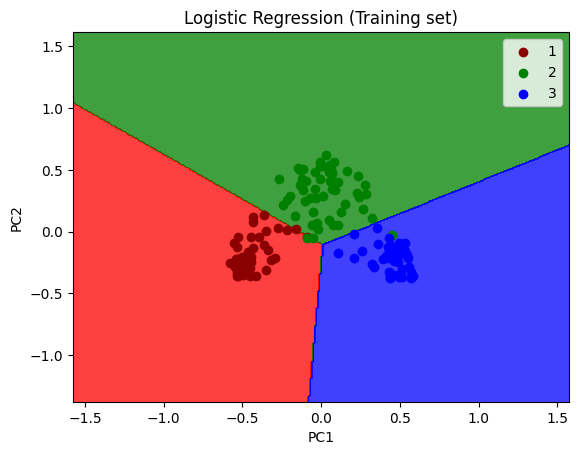

In [63]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-64-7e3f9fcd3c0c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


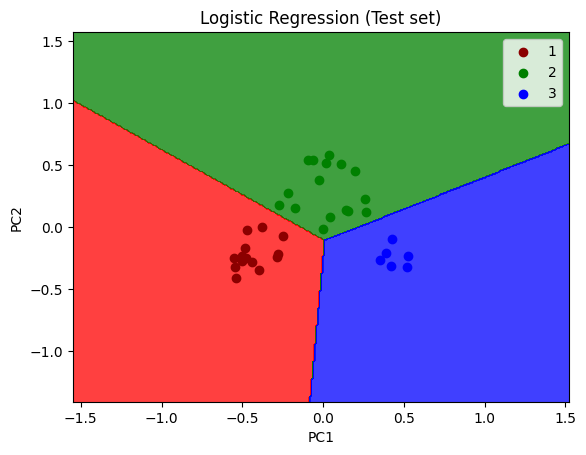

In [64]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

END